# Validation – Heat Transfer

ASTM E1355 - 12 {cite}`ASTM:E1355` is the 'Standard Guide for Evaluating the Predictive Capability of Deterministic Fire Models'
It provides a methodology for evaluating the predictive capabilities of a fire model for a specific use. The intent is to cover the whole range of deterministic numerical models which might be used in evaluating the effects of fires in and on structures. It gives a general definition of the terms verification and validation:

## Verification
The process of determining that the implementation of a calculation method accurately represents the developer’s conceptual description of the calculation method and the solution to the calculation method. It does not imply that the governing equations are appropriate; only that the equations are being solved correctly.

## Validation
The process of determining the degree to which a calculation method is an accurate representation of the real world from the perspective of the intended uses of the calculation method. It typically involves comparing model results with experimental measurement. Differences that cannot be explained in terms of numerical errors in the model or uncertainty in the measurements are attributed to the assumptions and simplifications of the physical model.

:::{figure-md} fig-validation-flowchart

<img src="figs/validation_verification.svg" width="60%">

Validation and Verification
:::


### Reality of interest
- physical system, data source
- hierarchy of experiments, unit

### Mathematical model
- conceptual and mathematical model
- PDEs, geometry, boundary- and initial conditions

### Computer model
- implementation of mathematical model
- numerical solver and algorithms

{cite}`ASTM:E1355` describes three basic types of validation calculations:

### Blind Calculation:
The model user is provided with a basic description of the scenario to be modeled. For this application, the problem description is not exact; the model user is responsible for developing appropriate model inputs from the problem description, including additional details of the geometry, material properties, and fire description, as appropriate.  Additional details necessary to simulate the scenario with a specific model are left to the judgment of the model user.  In addition to illustrating the comparability of models in actual end-use conditions, this will test the ability of those who use the model to develop appropriate input data for the models.

### Specified Calculation:
The model user is provided with a complete detailed description of model inputs, including geometry, material properties, and fire description. As a follow-on to the blind calculation, this test provides a more careful comparison of the underlying physics in the models with a more completely specified scenario.

### Open Calculation
The model user is provided with the most complete information about the scenario,including geometry, material properties, fire description, and the results of experimental tests or bench-mark model runs which were used in the evaluation of the blind or specified calculations of the scenario. Deficiencies in available input (used for the blind calculation) should become most apparent with comparison of the open and blind calculation.

## Documentation of validation and verification in FDS
The National Institute of Standards and Technology (NIST) provides separate documentations for the Fire Dynamics Simulator (FDS) and its visualization tool Smokeview (SMV). Each of these programs is accompanied by a user manual and a technical reference guide, which are continuously updated upon every minor release.

###  FDS User's Guide
 
The [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf) explains how to use the Fire Dynamics Simulator (FDS) but gives little to none theoretically background on fire dynamics. 

### Techical Reference Guide

The FDS Technical Reference Guide is based in part on the ASTM E1355 - 12 {cite}`ASTM:E1355`.
It is a four volume set of companion documents.

#### Technical Reference Guide Volume 1: Mathematical Model
The [Technical Reference Guide Volume 1: Mathematical Model](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_Technical_Reference_Guide.pdf) provides the theoretical (mathematical and physical) basis for the Fire Dynamics Simulator (FDS), according to {cite}`ASTM:E1355` .  

#### Technical Reference Guide Volume 2: Verification
The [Technical Reference Guide Volume 2: Verification](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_Verification_Guide.pdf) contains several analytical and numerical tests as well as sensitivity analyses and code checking algorithms for basic test cases.


#### Technical Reference Guide Volume 3: Validation
[Technical Reference Guide Volume 3: Validation](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_Validation_Guide.pdf) is a survey of several experiments that were mainly conducted at the NIST laboratories. The predictions from the numerical model are compared to measurements from the experiments.

#### Technical Reference Guide Volume 4: Configuration Management Plan
[Technical Reference Guide Volume 4: Configuration Management Plan](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_Config_Management_Plan.pdf) describes the policies and procedures for developing and maintaining the Fire Dynamics Simulator (FDS) and the companion visualization program, Smokeview (SMV). It is referred to as a Software Quality Assurance Plan according to IEEE Standard 828 and {cite}`ASTM:E1355`.

## Validation / Verification example

In order to calculate the incident heat flux, a concept called view factor is used. View factor is the proportion of the radiation which leaves the transmitter surface and strikes the receiver surface.

:::{figure-md} fig-validation-viewfactor

<img src="figs/device_viewfactor.png" width="70%">

The green point is the point on a target surface to be evaluated. It is the projection of a device on the hot surface. 

:::

The total heat flux that reaches the device is the sum of heat fluxes of all subsurfaces. The following equations calculate the fractional heat flux for the individual subsurfaces expressed by viewfactors $\mf \phi$ for simple cases:

Transmitter and receiver surfaces are parallel to each other:

$$\mf \phi = \frac{1}{2\pi}[\frac{a}{\sqrt{1+a^2}}tan^{-1}(\frac{b}{\sqrt{1+a^2}})+\frac{b}{\sqrt{1+b^2}}tan^{-1}(\frac{a}{\sqrt{1+b^2}})]$$

Transmitter and receiver surfaces are normal to each other:

$$\mf \phi = \frac{1}{2\pi}[tan^{-1}(a)-\frac{1}{\sqrt{1+b^2}}tan^{-1}(\frac{a}{\sqrt{1+b^2}})]$$

with $\mf a = \frac{z}{x}$ and $\mf b = \frac{y}{x}$,  where $\mf z$ is the height and $ \mf y$ is the width of the subsurface. $ \mf x$ is the distance between the point and the hot surface.

calculating the `incident heat flux` from the view factor for a given point:
$$
\mf q_{inc,rad}^{''} = \epsilon_{s} \cdot \phi_{total}
$$

### Task

The FDS input file {download}`radiation_validation.fds` is used for this simulation. Given is a room with one hot wall, $\mf temperature = 91.2717 °C$ and other cold surfaces, $\mf temperature = -272.15 °C$. Ten devices are defined for measuring the incident and radiative heat fluxes on both front and adjacent sides of the hot wall diagonally, as it is shown below.

In order to omit the influence of convective heat transfer, there should be no air in the room, which is considered in the input file by 
`SOLID_PHASE_ONLY = .TRUE.` on the `MISC` line.
The objective of this task is to validate the results of the FDS simulation with the analytical calculations. After executing the simulation and reading the results with python, both, incident and radiative heat fluxes are calculated for all devices.

:::{figure-md} fig-validation-geometry

<img src="figs/Geometry.png" width="70%">

The geometry, location of the hot surface and the devices.
:::
1. Evaluate the boundary files for the `INCIDENT HEAT FLUX`, the `RADIATIVE HEAT FLUX` and the `GAUGE HEAT FLUX`. Assume $\sf T_{gauge}=-100°C $. The output quantities related to the thermal exposure of solid surfaces are explained in section 21.10.7 [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf). Quantities on a solid obstruction can be recorded using the `BNDF` namelist group. It can be defined similar to `SLCF` like:
    ```
    &BNDF QUANTITY='NET HEAT FLUX', CELL_CENTERED=.TRUE. /
    ```
    For more detailed information on how to set up `BNDF` in FDS please refer to section 21.5 [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf).
2. Calculate the heat flux for a single point on the parallel plane at x = 1, y = 0.333 and z = 0.667 using analytical formulas and compare the results to the output of the corresponding device of the FDS calculation.
3. Evaluate the the `INCIDENT HEAT FLUX` for the respective positions of the line device and compare it to the analytical solutions. Calculate the view factors using e.g. spreadsheet application or Python. Do the same for `RADIATIVE HEAT FLUX` as well as the `GAUGE HEAT FLUX`.
4. Execute the simulation with higher value for `NUMBER_RADIATION_ANGLES`, $\mf 200$ and $\mf 500$ respectively. Add `SLCF` files with `QUANTITY='INTEGRATED INTENSITY'` at `PBX=0.98` and check out the `SLCF` file in Smokeview. Plot the `incident heat flux` for front and side and compare it with the analytical ones for  `NUMBER_RADIATION_ANGLES = 500`.

### Input file parameters explained

Regarding `RADI` namelist in the input file, the frequency of calls to the radiation solver can be changed from every $\mf 3$ time steps with an integer
called `TIME_STEP_INCREMENT`. The increment over which the angles are updated can be reduced from
$\mf 5$ with the integer called `ANGLE_INCREMENT`. If `TIME_STEP_INCREMENT` and `ANGLE_INCREMENT` are
both set to $\mf 1$, the radiation field is completely updated in a single time step, but the cost of the calculation
increases significantly.

There are several ways to improve the spatial and temporal accuracy of the discrete radiation transport equation
(RTE), but each typically increases the computation time. The spatial accuracy can be improved by increasing
the number of angles from the default $\mf 100$ with the integer parameter `NUMBER_RADIATION_ANGLES`.
Typically, you see high values of this quantity near sources of heat, and
these values decrease farther away. Ideally, you should see a somewhat smooth and circular pattern far
from the heat source, but because of the finite number of solid angles along which the radiation intensity is tracked, you will see in the far field a star-like pattern that is not physical. For more information refer to section 16.2 [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf).

Following are the parameters of the `DUMP` namelist in the input file.
`SMOKE3D = .FALSE.` does not produce an animation of the smoke and fire. `DT_PL3D` is the time between Plot3D file output. `DT_DEVC` works like `NFRAMES`, but only controls the output of devices. For more detailed description refer to section 21.1 [FDS User's Guide](https://github.com/firemodels/fds/releases/download/FDS6.7.5/FDS_User_Guide.pdf)

### Solution

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dev = pd.read_csv('radiation_line.csv', delimiter=',', skiprows=1)

#### Analytical results for both device lines

In [2]:
# Heat fluxes for devices on the front

# Coordination of the hot surface
y_min, y_max, z_min, z_max = 0,1,0,1 

inc_front_analytics = []
rad_front_analytics = []
gauge_front_analytics = []

'Transmitter and receiver parallel'
x = 1.0


'Incident:'
for i in range(len(dev['inc_flux_front-y'])):
    y = dev['inc_flux_front-y'][i]
    z = dev['inc_flux_front-z'][i]
    
    # height and width of four subsurfaces for each device 
    device = np.array([[y - y_min, z - z_min],
                       [y_max - y, z - z_min],
                       [y - y_min, z_max - z],
                       [y_max - y, z_max - z]]) 
                       
    subsurf = 0
    for s in range(len(device)):
        b = device[s][0]/x
        a = device[s][1]/x

        subsurf += (1/(2*np.pi)) * ((a/np.sqrt(1+a**2)) * np.arctan(b/np.sqrt(1+a**2)) + \
                   (b/np.sqrt(1+b**2)) * np.arctan(a/np.sqrt(1+b**2)))
    inc_front_analytics.append(subsurf)
        
dev['inc_front_analytics'] = inc_front_analytics


'Radiative:'
for f in dev['inc_front_analytics']:
    rad_front_analytics.append(1 * (f - 5.67*(10**-8) * (((-272.15)+273.15)**4)))
    
dev['rad_front_analytics'] = rad_front_analytics

'Gauge:'
for f in inc_front_analytics:

    gauge_front_analytics.append(0.9 * (f - (5.67*(10**-8) * (((-100)+273.15)**4))))

dev['gauge_front_analytics'] = gauge_front_analytics

In [16]:
# Heat fluxes for devices on the side 
inc_side_analytics = []
rad_side_analytics = []
gauge_side_analytics = []

'Transmitter and receiver normal'
y = 0.0


'Incident:'
for i in range(len(dev['inc_flux_side-x'])):
    x = dev['inc_flux_side-x'][i]
    z = dev['inc_flux_side-z'][i]
    # height and width of two subsurfaces for each device 
    device = np.array([[y_max - y, z - z_min],
                       [y_max - y, z_max - z]])
    
    subsurf = 0
    for s in range(len(device)):
        b = device[s][0]/x
        a = device[s][1]/x
        
        subsurf += (1/(2*np.pi)) * (np.arctan(a)-(1/np.sqrt(1+b**2)) * np.arctan(a/np.sqrt(1+b**2)))
    inc_side_analytics.append(subsurf)

dev['inc_side_analytics'] = inc_side_analytics
dev['distances'] = np.linspace(0,1,10)


'Radiative:'
for f in dev['inc_side_analytics']:
    rad_side_analytics.append(1 * (f - 5.67*(10**-8) * (((-272.15)+273.15)**4)))
    
dev['rad_side_analytics'] = rad_side_analytics
dev

'Gauge:'
for f in inc_side_analytics:

    gauge_side_analytics.append(0.9 * (f - (5.67*(10**-8) * (((-100)+273.15)**4))))

dev['gauge_side_analytics'] = gauge_side_analytics

#### Single device

Here is the calculation of the incident and radiative heat fluxes for one of the devices at x = 1, y = 0.333 and z = 0.667 using analytical formulas.

First calculate a and b for each subsurface.

$$\mf a_1 = \frac{0.666667 - 0}{1} = 0.667~m,~b_1 = \frac{0.333333 - 0}{1} = 0.333 m$$

$$\mf a_2 = \frac{0.666667 - 0}{1} = 0.667~m,~b_2 = \frac{1 - 0.333333}{1} = 0.667~m$$

$$\mf a_3 = \frac{1 - 0.666667}{1} = 0.333~m,~b_3 = \frac{0.333333 - 0}{1} = 0.333~m$$

$$\mf a_4 = \frac{1 - 0.666667}{1} = 0.333~m,~b_4 = \frac{1 - 0.333333}{1} = 0.667~m$$

Now calculate the view factor for each of the subsurfaces.

$$\mf \phi_1 = \frac{1}{2\pi}[\frac{0.667}{\sqrt{1+0.666^2}}tan^{-1}(\frac{0.333}{\sqrt{1+0.667^2}})+\frac{0.333}{\sqrt{1+0.333^2}}tan^{-1}(\frac{0.667}{\sqrt{1+0.333^2}})] = 0.052267$$

$$\mf \phi_2 = \frac{1}{2\pi}[\frac{0.667}{\sqrt{1+0.667^2}}tan^{-1}(\frac{0.667}{\sqrt{1+0.667^2}})+\frac{0.667}{\sqrt{1+0.667^2}}tan^{-1}(\frac{0.667}{\sqrt{1+0.667^2}})] = 0.089421$$

$$\mf \phi_3 = \frac{1}{2\pi}[\frac{0.333}{\sqrt{1+0.333^2}}tan^{-1}(\frac{0.333}{\sqrt{1+0.333^2}})+\frac{0.333}{\sqrt{1+0.333^2}}tan^{-1}(\frac{0.333}{\sqrt{1+0.333^2}})] = 0.030829$$

$$\mf \phi_4 = \frac{1}{2\pi}[\frac{0.333}{\sqrt{1+0.333^2}}tan^{-1}(\frac{0.667}{\sqrt{1+0.333^2}})+\frac{0.667}{\sqrt{1+0.667^2}}tan^{-1}(\frac{0.333}{\sqrt{1+0.667^2}})] = 0.052267$$

$$\mf \phi = \phi_1+\phi_2+\phi_3+\phi_4 =  0.224786$$

Incident heat flux is:

$$\mf q_{inc,rad}^{''} =\phi \cdot \sigma \cdot (T_r + 273)^4 = 0.224786 \cdot 5.67 \cdot 10^{-8} \cdot (91.27+273)^4 = 224  \frac{W}{m^2}$$

And the radiative heat flux is:

$$\mf q_{r}^{''} = \epsilon_{s} (q_{inc,rad}^{''} - \sigma T_{s}^4) = 1.0 \cdot (0.224786 - 5.67 \cdot 10^{-8} \cdot (-272.15+273.15)^4) = 0.224786  \frac{kw}{m^2}$$

In [4]:
#Alternative for calculating the flux for a single device by hand(above solution) is:
#Only on the parallel surface

def heat_flux(y,z):
    
    single_analytics = []
    
    # Coordination of the hot surface
    y_min, y_max, z_min, z_max = 0,1,0,1
    x = 1.0

    #Incident heat flux 
    device = np.array([[y - y_min, z - z_min],
                       [y_max - y, z - z_min],
                       [y - y_min, z_max - z],
                       [y_max - y, z_max - z]])
    
    subsurf = 0
    for s in range(len(device)):
        b = device[s][0]/x
        a = device[s][1]/x
        
        subsurf += (1/(2*np.pi)) * ((a/np.sqrt(1+a**2)) * np.arctan(b/np.sqrt(1+a**2)) + \
                   (b/np.sqrt(1+b**2)) * np.arctan(a/np.sqrt(1+b**2)))
    single_analytics.append(subsurf)
    
    #Radiative heat flux, emissivity=1 and Temperature=-272.15°C
    single_analytics.append(1.0 * (single_analytics[0] - 5.67*(10**-8) * (((-272.15)+273.15)**4)))
    
    return "Incident heat flux:{}, Radiative heat flux:{}".format(single_analytics[0],single_analytics[1])

#### Plotting the results

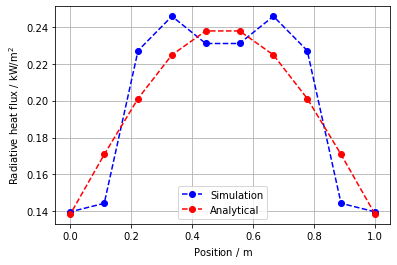

In [15]:
# Validating the results (Simulation vs. Analytical)

plt.plot(dev['distances'],dev['inc_flux_front'], '--bo', label='Simulation')
plt.plot(dev['distances'],dev['inc_front_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Incident heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/incident_front.svg')
plt.close()
plt.plot(dev['inc_flux_side-z'],dev['inc_flux_side'], '--bo', label='Simulation')
plt.plot(dev['inc_flux_side-z'],dev['inc_side_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Incident heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/incident_side.svg')
plt.close()
plt.plot(dev['inc_flux_front-z'],dev['rad_flux_front'], '--bo', label='Simulation')
plt.plot(dev['inc_flux_front-z'],dev['rad_front_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Radiative heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/radiative_front.svg')
plt.close()
plt.plot(dev['inc_flux_side-z'],dev['rad_flux_side'], '--bo', label='Simulation')
plt.plot(dev['inc_flux_side-z'],dev['rad_side_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Radiative heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/radiative_side.svg')
plt.close()
plt.plot(dev['gauge_front-z'],dev['gauge_front'], '--bo', label='Simulation')
plt.plot(dev['gauge_front-z'],dev['gauge_front_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Gauge heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/gauge_flux_front.svg')
plt.close()
plt.plot(dev['gauge_front-z'],dev['gauge_side'], '--bo', label='Simulation')
plt.plot(dev['gauge_front-z'],dev['gauge_side_analytics'], '--ro', label='Analytical')
plt.xlabel('Position / $\sf m $')
plt.ylabel('Gauge heat flux / $\sf kW/m^2 $')
plt.legend()
plt.grid()
plt.savefig('figs/gauge_flux_side.svg')
plt.close()

:::{figure-md} fig-validation-heatflux-incident-front

<img src="figs/incident_front.svg" width="80%">

Incident heat flux front

:::
            
:::{figure-md} fig-validation-heatflux-radiative-front

<img src="figs/radiative_front.svg" width="80%">

Radiative heat flux front
:::

:::{figure-md} fig-validation-heatflux-incident-side

<img src="figs/incident_side.svg" width="80%">

Incident heat flux side
:::
            
:::{figure-md} fig-validation-heatflux-radiative-side

<img src="figs/radiative_side.svg" width="80%">

Radiative heat flux side
:::
            
:::{figure-md}

<img src="figs/gauge_flux_front.svg" width="80%">

Gauge heat flux front, $\sf T_{gauge}=-100°C$
:::
            
:::{figure-md}

<img src="figs/gauge_flux_side.svg" width="80%">

Gauge heat flux side, $\sf T_{gauge}=-100°C$
:::

#### Higher value for `NUMBER_RADIATION_ANGLES`

:::{figure-md} fig-validation-heatflux-rad-angles

<img src="figs/rad_angle.png" width="100%">

`SLCF` file in `PBX = 0.98` for radiation intensity. From left to right, the `NUMBER_RADIATION_ANGLES` is set to $\sf 100$, $\sf 200$ and $\sf 500$.
:::

Comparing the `incident heat flux` results, when `NUMBER_RADIATION_ANGLES = 500`.

:::{figure-md} fig-validation-heatflux-rad-angles-front

<img src="figs/incident_front_500.svg" width="80%">

Incident heat flux front

:::
            
:::{figure-md} fig-validation-heatflux-rad-angles-side

<img src="figs/incident_side_500.svg" width="80%">

Radiative heat flux front
:::